In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_naivebayes_dataset.csv')
df.head(5)

,Gender,AgeGroup,StudyHours,Result
0,Male,Teen,Low,Fail
1,Female,Teen,Medium,Pass
2,Male,Adult,High,Pass
3,Female,Adult,Low,Fail
4,Female,Teen,Medium,Pass


<Figure size 600x400 with 0 Axes>

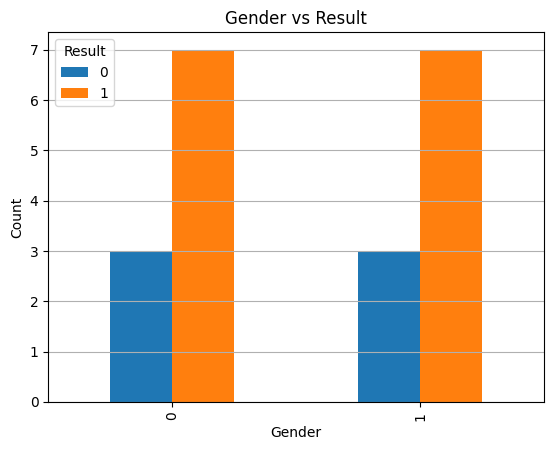

<Figure size 600x400 with 0 Axes>

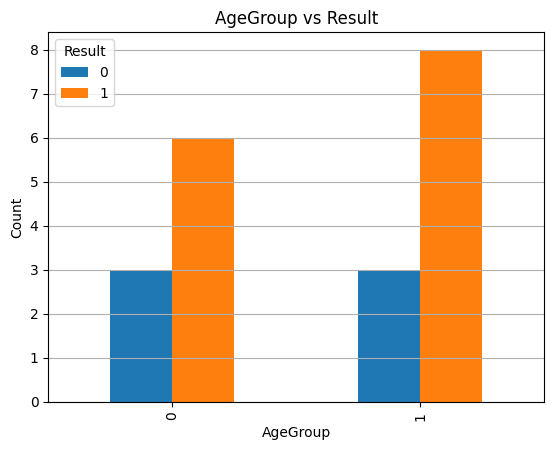

<Figure size 600x400 with 0 Axes>

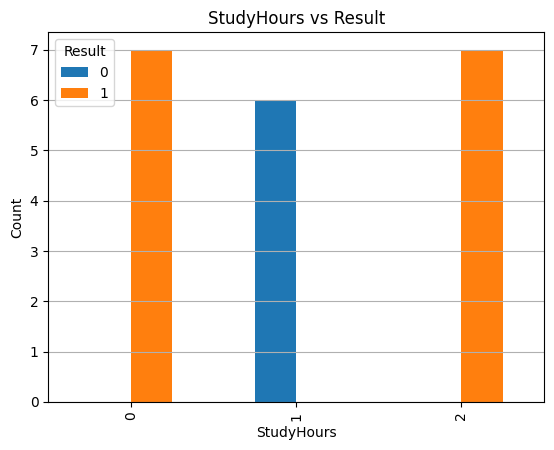

In [8]:
import matplotlib.pyplot as plt

# Plot count of classes for each attribute
attributes = ['Gender', 'AgeGroup', 'StudyHours']

for col in attributes:
    plt.figure(figsize=(6,4))
    pd.crosstab(df[col], df['Result']).plot(kind='bar')
    plt.title(f'{col} vs Result')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()

In [3]:
# Encode categorical features
encoders = {}
for col in ['Gender', 'AgeGroup', 'StudyHours', 'Result']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [4]:
# Features and target
X = df[['Gender', 'AgeGroup', 'StudyHours']]
y = df['Result']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train Naive Bayes classifier
model = CategoricalNB()
model.fit(X_train, y_train)

CategoricalNB()

In [6]:
# Predictions
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1 0]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [7]:
# Example new input
new_sample = pd.DataFrame([{
    'Gender': 'Female', 'AgeGroup': 'Teen', 'StudyHours': 'High'
}])

# Encode using fitted encoders
for col in ['Gender', 'AgeGroup', 'StudyHours']:
    new_sample[col] = encoders[col].transform(new_sample[col])

# Predict
prediction = model.predict(new_sample)
result_label = encoders['Result'].inverse_transform(prediction)
print("Predicted Result:", result_label[0])

Predicted Result: Pass
